In [34]:
import torch
from FPenv import FPEnv

# Recreate training env
env = FPEnv(fp_path="Floorplans/RL/Torresdale/floorplan.json")

# Load Trained Models
model = torch.load('Models/Torresdale/AM/TrainOnTorresdaleV1.pth')

In [35]:
# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Real Floorplan Path Finding with Reinforcement Learning and Astar Search

Actions Sizes: torch.Size([87])
Actions indices: tensor([119, 120, 121, 122, 123,   0,   1,   2,   3,   4,   5,   6,   7,   8,
          9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
         23,  24,  25,  26,  27, 135,  28,  29,  30, 118, 113, 114, 115, 116,
        117,  31,  33,  44,  45,  46,  47,  58,  59,  60,  61,  72,  73,  74,
         75,  76,  77,  78,  79,  80, 127, 145, 146, 132,  81,  82,  83,  84,
         85,  86,  87,  88,  91,  92,  93,  94,  95, 128, 147, 134, 148, 133,
         96,  97,  98])
Actions Sizes: torch.Size([60])
Actions indices: tensor([137, 119, 120, 121, 122, 123,   0,   1,   2,   3,   4,   5,   6,   7,
          8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
         22,  32,  31,  33,  44,  45,  46,  47,  58,  59,  60,  61,  72,  73,
         74,  75,  86,  87,  88,  91,  92,  93,  94,  95, 128, 147, 134, 148,
        133,  96,  97,  98])


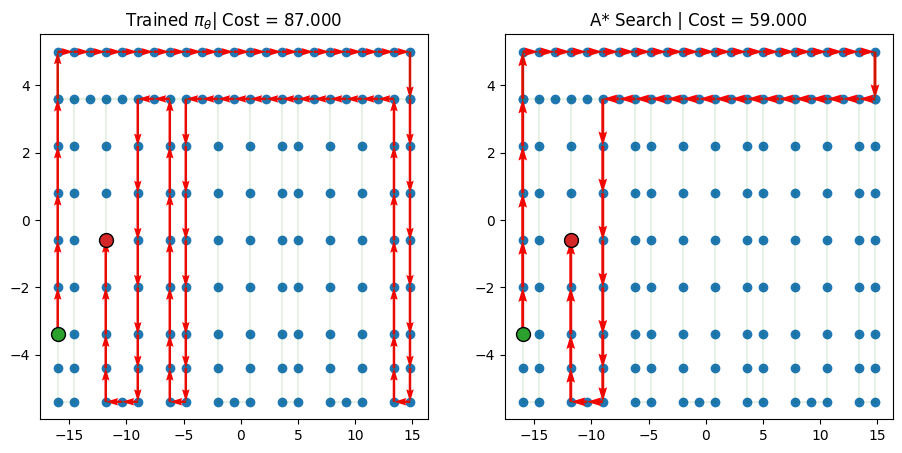

Actions Sizes: torch.Size([68])
Actions indices: tensor([148, 133,  96,  97,  98,  99, 100, 101, 102, 103,  90,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27, 135,  28,  29,
         30, 118, 113, 114, 115, 116, 117,  31,  33,  44,  45,  46,  47,  58,
         59,  60,  61,  72,  73,  74,  75,  76,  77,  78,  79,  80])
Actions Sizes: torch.Size([55])
Actions indices: tensor([134, 148, 133,  96,  97,  98,  99, 100, 101, 102, 103,  90,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  32,  31,  33,  44,  45,  46,  47,
         58,  59,  60,  61,  72,  73,  74,  75,  76,  77,  78,  79,  80])


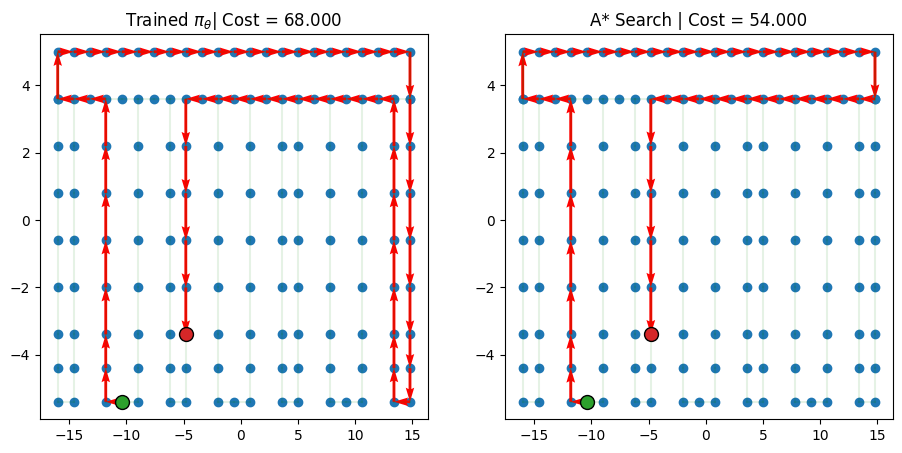

Actions Sizes: torch.Size([68])
Actions indices: tensor([148, 133,  96,  97,  98,  99, 100, 101, 102, 103,  90,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27, 135,  28,  29,
         30, 118, 113, 114, 115, 116, 117,  31,  33,  44,  45,  46,  47,  58,
         59,  60,  61,  72,  73,  74,  75,  76,  77,  78,  79,  80])
Actions Sizes: torch.Size([55])
Actions indices: tensor([134, 148, 133,  96,  97,  98,  99, 100, 101, 102, 103,  90,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  32,  31,  33,  44,  45,  46,  47,
         58,  59,  60,  61,  72,  73,  74,  75,  76,  77,  78,  79,  80])


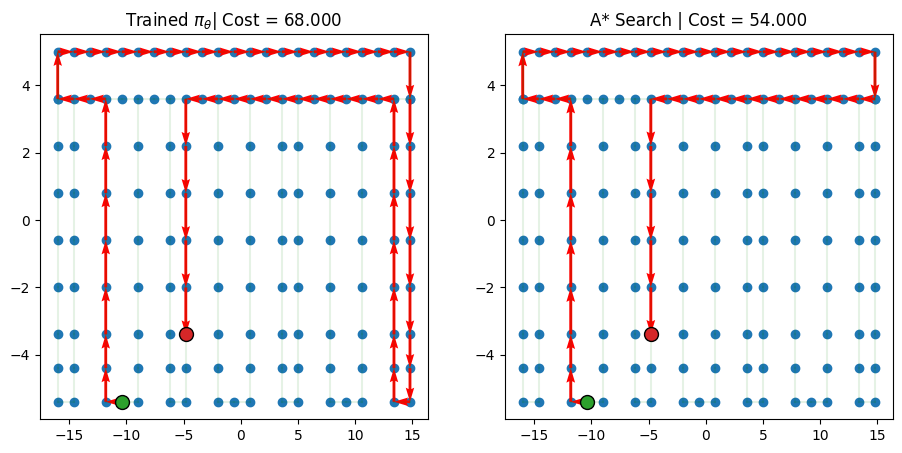

Actions Sizes: torch.Size([67])
Actions indices: tensor([144, 131,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,  78,  79,
         80, 127, 145, 146, 132,  81,  82,  83,  84,  85,  86,  87,  88,  91,
         92,  93,  94,  95, 128, 147, 134, 148, 133,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 137, 119,
        120, 121, 122, 123,   0,   1,   2,   3,   4,   5,   6])
Actions Sizes: torch.Size([26])
Actions indices: tensor([136, 144, 131,  67,  68,  69,  70,  71,  73,  74,  75,  86,  87,  88,
         89, 101, 102, 103,  90,   0,   1,   2,   3,   4,   5,   6])


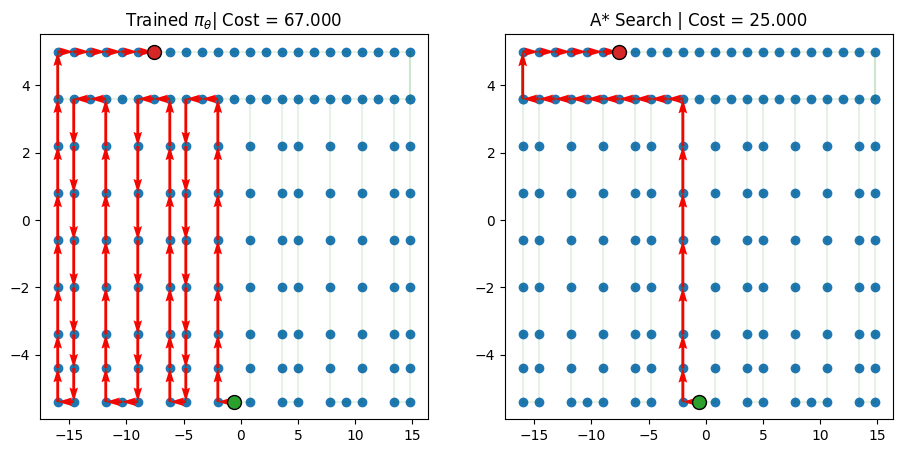

In [36]:
from FPenv import FPEnv
from astar import AStarSearch
import torch

# Name for the floorplan
floorplan_name = "Torresdale"

# Setup a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

infer_env = FPEnv(fp_path="Floorplans/RL/Torresdale/floorplan.json")
td_init = infer_env.reset(batch_size=[4]).to(device)

policy = model.policy.to(device)

out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
actions_trained = out['actions'].cpu().detach()

# run A* search on the environment
astar = AStarSearch(td_init.clone())
astar_out = astar.search()
actions_astar = astar_out["actions"].cpu().detach()

# Plotting
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    fig, axs = plt.subplots(1,2, figsize=(11,5))

    infer_env.render(td, actions_trained[i], ax=axs[0])
    axs[0].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")

    infer_env.render(td, actions_astar[i], ax=axs[1])
    axs[1].set_title("A* Search | Cost = {:.3f}".format(-astar_out["reward"][i].item()))

    plt.savefig(f"media/plot_{floorplan_name}_{i}.png", format='png', dpi=300)

    plt.show()


In [40]:
import numpy as np

# Recreate training env
env = FPEnv(fp_path="Floorplans/RL/Torresdale/floorplan.json")

# Load Trained Models
model = torch.load('Models/Torresdale_AM/TrainOnTorresdaleV1.pth')

# Initialize the total costs
total_cost_trained = 0
total_cost_astar = 0
cost_list_trained = np.array([])
cost_list_astar = np.array([])

# Number of runs
num_runs = 100

batch_size = 4

# Initialize the action lists
actions_trained = []
actions_astar = []

# Initialize the TensorDict list
td_list = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

infer_env = FPEnv(fp_path="Floorplans/RL/Torresdale/floorplan.json")
td_init = infer_env.reset(batch_size=[4]).to(device)

policy = model.policy.to(device)

for _ in range(num_runs):
    # Initialize the action lists for the current run
    actions_trained_run = []
    actions_astar_run = []

    td_init = infer_env.reset(batch_size=[batch_size]).to(device)

    # Run the trained DRL model
    out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
    total_cost_trained += out['reward'].sum().item()

    # Run A* search
    astar = AStarSearch(td_init.clone())
    astar_out = astar.search()
    total_cost_astar += astar_out["reward"].sum().item()

    # Store the TensorDict
    td_list.append(td_init)

    # Store the output of the astar and trained model
    actions_trained.append(out["actions"].cpu().detach())
    actions_astar.append(astar_out["actions"].cpu().detach())

    # Store the cost of the trained model and A* search
    cost_list_trained = np.append(cost_list_trained, out["reward"].cpu().detach().numpy())
    cost_list_astar = np.append(cost_list_astar, astar_out["reward"].cpu().detach().numpy())

    # Append the action lists for the current run to the overall action list
    # actions_trained.append(actions_trained_run)
    # actions_astar.append(actions_astar_run)

# How many -1000 rewards are there in the trained DRL model
nosols_trained = np.sum(cost_list_trained < -800)
print(f"Number of unsolved problems in trained DRL model: {nosols_trained}")

# Remove all the -1000 rewards
cost_list_trained_filtered = cost_list_trained[cost_list_trained > -800]

# Filter out the indices of the cost_list_trained_filtered from the original cost_list_trained
indices = np.where(cost_list_trained > -800)
cost_list_astar_filtered = cost_list_astar[indices]

Number of unsolved problems in trained DRL model: 0


Mean cost of trained DRL model over 400 runs: -47.443
Mean cost of A* search over 400 runs: -34.458
Median cost of trained DRL model over 400 runs: -48.500
Median cost of A* search over 400 runs: -33.500
Standard deviation of trained DRL model over 400 runs: 24.607
Standard deviation of A* search over 400 runs: 15.627


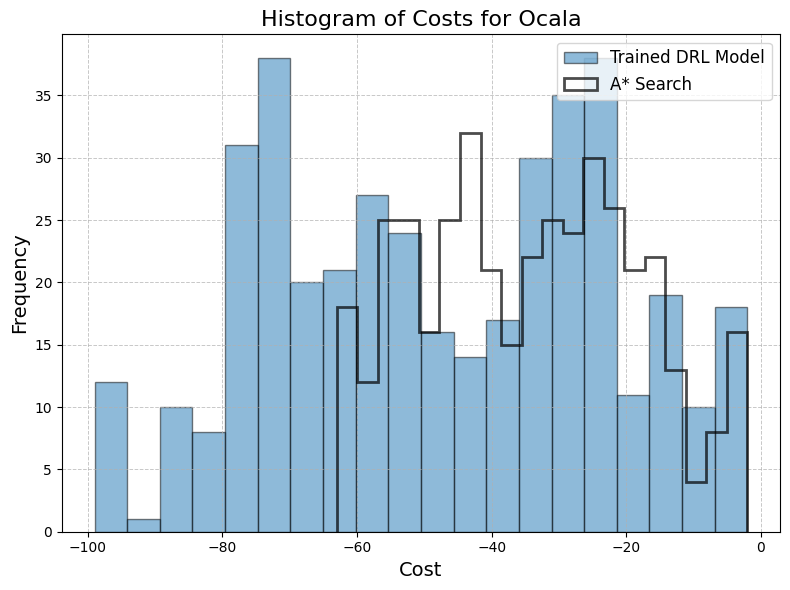

[60 21 66]
[-62. -62. -63.]


In [41]:
# Calculate the average costs
print ("Mean cost of trained DRL model over {} runs: {:.3f}".format(num_runs * batch_size, cost_list_trained_filtered.mean()))
print ("Mean cost of A* search over {} runs: {:.3f}".format(num_runs * batch_size, cost_list_astar_filtered.mean()))

# Calculate the mean and standard deviation of the costs
print ("Median cost of trained DRL model over {} runs: {:.3f}".format(num_runs * batch_size, np.median(cost_list_trained_filtered)))
print ("Median cost of A* search over {} runs: {:.3f}".format(num_runs * batch_size, np.median(cost_list_astar_filtered)))
print ("Standard deviation of trained DRL model over {} runs: {:.3f}".format(num_runs * batch_size, cost_list_trained_filtered.std()))
print ("Standard deviation of A* search over {} runs: {:.3f}".format(num_runs * batch_size, cost_list_astar_filtered.std()))

# Plot the histogram of the costs
plt.figure(figsize=(8, 6))

plt.hist(cost_list_trained_filtered, bins=20, alpha=0.5, label='Trained DRL Model', color='tab:blue', edgecolor='black')
plt.hist(cost_list_astar_filtered, bins=20, alpha=0.7, label='A* Search', color='tab:orange', edgecolor='black', histtype='step', linewidth=2)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add axis labels and title
plt.xlabel('Cost', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Title with the floorplan name included
plt.title(f'Histogram of Costs for {floorplan_name}', fontsize=16)

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot
plt.savefig(f'media/{floorplan_name}_histogram.png', format='png', dpi=300)

# Show the plot
plt.show()

# Get the indices of the runs with the highest costs
worst_runs = np.argsort(cost_list_astar_filtered)[::-1][-3:]
print(worst_runs)
print(cost_list_astar_filtered[worst_runs])

def plot_bad_runs():
    # Plot the actions for the first run
    import matplotlib.pyplot as plt

    # Plot the actions with the largest difference between the trained model and A* search
    diff = - cost_list_trained + cost_list_astar
    largest_diffs = np.argsort(diff)[::-1][:32]
    print(largest_diffs)

    for run in largest_diffs:
        quotient, remainder = divmod(run, batch_size)
        print(quotient, remainder)
        for i, td in enumerate(td_list[quotient]):
            if i == remainder:
                fig, axs = plt.subplots(1,2, figsize=(11,5))

                try:
                    infer_env.render(td, actions_trained[quotient][i], ax=axs[0])
                    axs[0].set_title(r"Trained $\pi_\theta$" + f"| Cost = {cost_list_trained[run]:.3f}")
                except Exception as e:
                    print(e)
                    print("Error in plotting trained model")
                    pass

                infer_env.render(td, actions_astar[quotient][i], ax=axs[1])
                axs[1].set_title("A* Search | Cost = {:.3f}".format(cost_list_astar[run]))


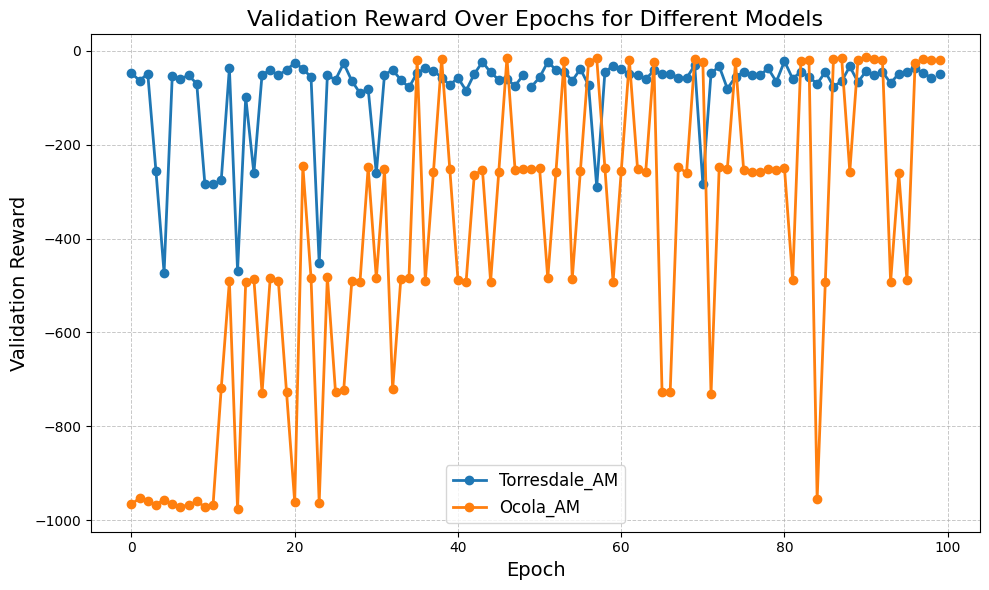

In [46]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def plot_training_metrics(models_folder='Models'):
    plt.figure(figsize=(10, 6))  # Set up figure size for academic style

    # Loop over all CSV files in the Models folder
    for model_path in glob.glob(f'{models_folder}/**/metrics.csv', recursive=True):
        # Extract folder name for the plot legend
        folder_name = os.path.basename(os.path.dirname(model_path))
        
        # Load the data from CSV
        data = pd.read_csv(model_path)

        # Plot the 'val/reward' column over epochs, ignoring NaN values
        plt.plot(data['epoch'], data['val/reward'], marker='o', label=f'{folder_name}', linewidth=2)

    # Add academic-style labels and title
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Validation Reward', fontsize=14)
    plt.title('Validation Reward Over Epochs for Different Models', fontsize=16)

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add legend to describe each model based on folder name
    plt.legend(fontsize=12, loc='best')

    # Ensure the plot layout is tight for proper spacing
    plt.tight_layout()

    # Save the plot with high resolution
    plt.savefig('media/validation_rewards.png', format='png', dpi=300)

    # Show the plot
    plt.show()

# Call the function to generate the plot
plot_training_metrics()

In [ ]:
from FPenv import FPEnv
from astar import AStarSearch
from Floorplan_Codes.utils import get_paths
import torch

# Setup a device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

floorplans = get_paths("floorplan.json", "Floorplans/USPS", recursive=True, depth=1)
ids = []
for floorplan in floorplans:
    try:
        infer_env = FPEnv(fp_path=floorplan)
        td_init = infer_env.reset(batch_size=[4]).to(device)


        # Function to check for NaNs in a tensor dictionary
        nan_found = False
        for key, tensor in td_init.items():
            if torch.isnan(tensor).any():
              nan_found = True
              print(f"NaN values found in tensor '{key}'")
        if not nan_found:
            print("No NaN values found in the tensor dictionary.")

        policy = model.policy.to(device)

        out = policy(td_init.clone(), infer_env, phase="test", decode_type="greedy", return_actions=True)
        actions_trained = out['actions'].cpu().detach()

        # run A* search on the environment
        astar = AStarSearch(td_init.clone())
        astar_out = astar.search()
        actions_astar = astar_out["actions"].cpu().detach()

        # Plotting
        import matplotlib.pyplot as plt
        for i, td in enumerate(td_init):
            fig, axs = plt.subplots(1,2, figsize=(11,5))

            parts = floorplan.split('/')
            site = parts[-2]
            fig.suptitle("Floorplan: " + site, fontsize=16)

            infer_env.render(td, actions_trained[i], ax=axs[0])
            axs[0].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")

            infer_env.render(td, actions_astar[i], ax=axs[1])
            axs[1].set_title("A* Search | Cost = {:.3f}".format(-astar_out["reward"][i].item()))
    except Exception as e:
        print(e)
        continue

random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
Expecting value: line 1 column 1 (char 0)
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random_ expects 'from' to be less than 'to', but got from=0 >= to=0
random